### Notebook Summary

Visualize the distribution of the features by class and determine is there is any visually discernible patterns between the two classes in the feature space.

- distribution of features in majority and minority class
- features V1 to V28 plotted against the feature amount
- all features plotted against the Time variable

The range of the minority class features is much narrower compared to that of the majority classes in most cases but there appears to be overlap between the majority and minority features in those ranges. A clear separation is not visually discernible. Multiple features together probably define the class boundary.

### Python Packages

In [1]:
import os
import sys

In [2]:
import pandas as pd
from collections import Counter

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Custom Modules

In [4]:
sys.path.append("../Codebase") 
import config as _config

### Parameters and Vaiables

### Load Data

In [5]:
path = os.path.join(_config.DATA_DIR, 'Raw')
filename = 'creditcard.csv'

df_input = pd.read_csv( os.path.join(path, filename))
df_input = df_input.drop_duplicates()

In [6]:
df_input.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Inspect Variable Range

#### Define target and feature columns

In [7]:
target = 'Class'
features = df_input.columns.tolist()
features.remove(target)

#### Separate data frame by class

In [8]:
df_0 = df_input[df_input['Class']==0]
df_1 = df_input[df_input['Class']==1]

#### Plot data distribution by class

/Users/susmitadatta/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


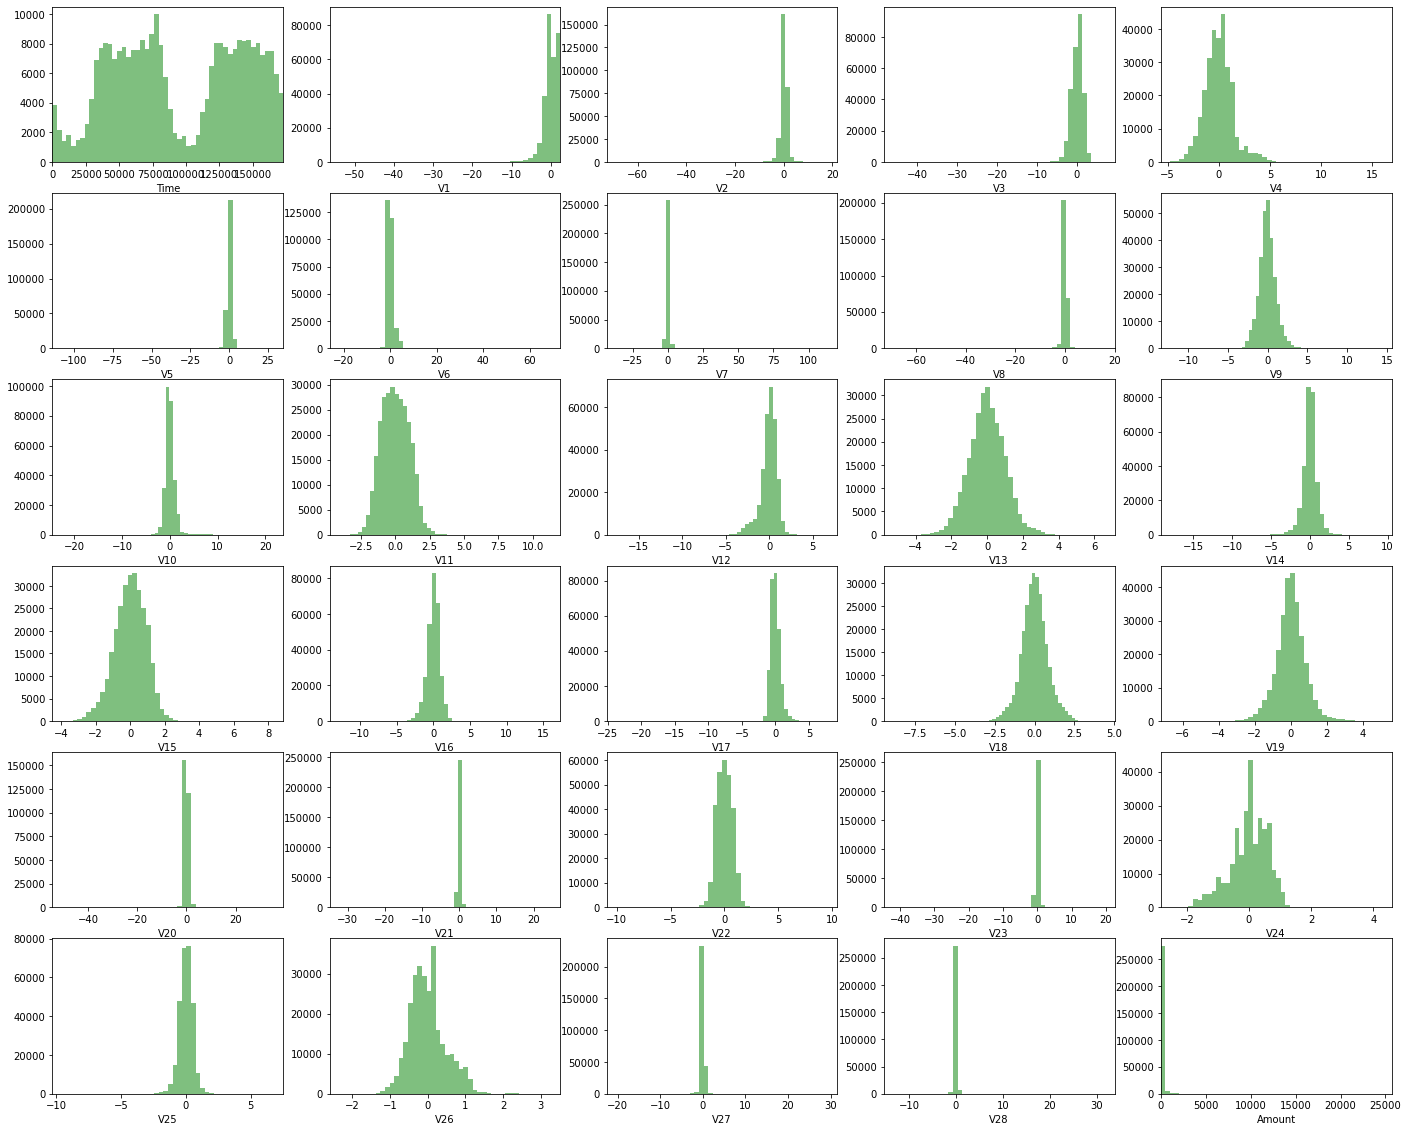

In [9]:

nrow = 6
ncol = 5
fig, ax = plt.subplots(6, 5, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.5))
    
    ax[r, c].set_xlim(df_input[feat].min(), df_input[feat].max())
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1
        

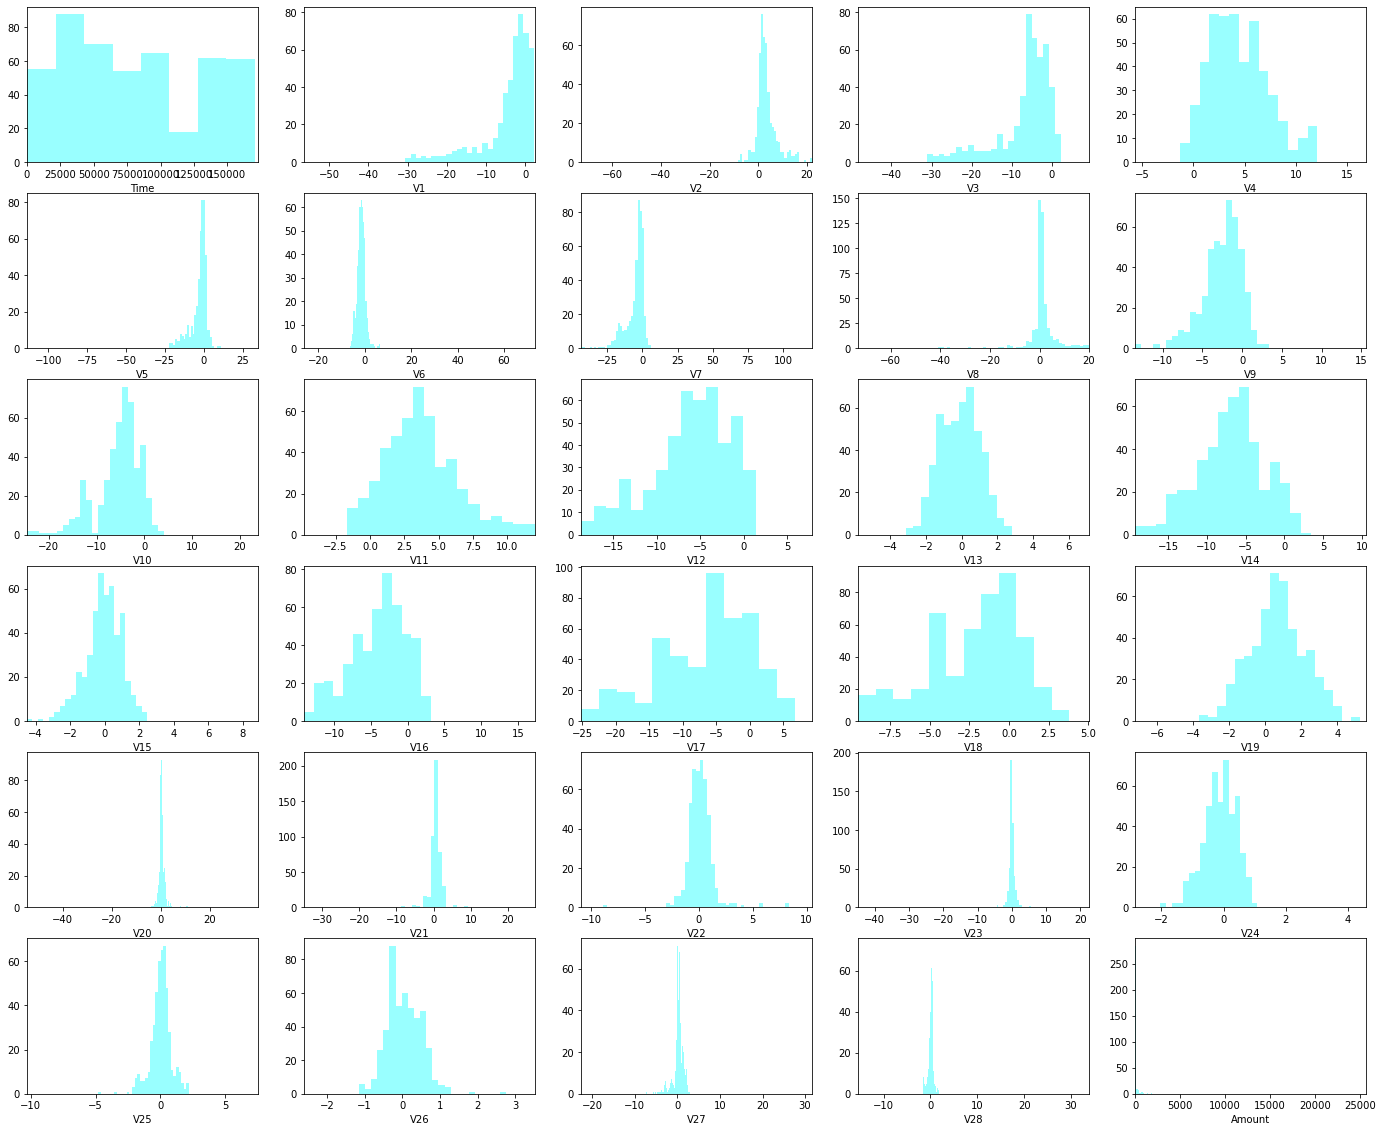

In [10]:
nrow = 6
ncol = 5 
fig, ax = plt.subplots(6, 5, figsize=(nrow*4, ncol*4))

r, c = 0, 0

for feat in features:
    
    feat1 = df_1[feat]
    
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c])
    ax[r, c].set_xlim(df_input[feat].min(), df_input[feat].max() )
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1
    

#### Plot corr of each variable with Amount by class

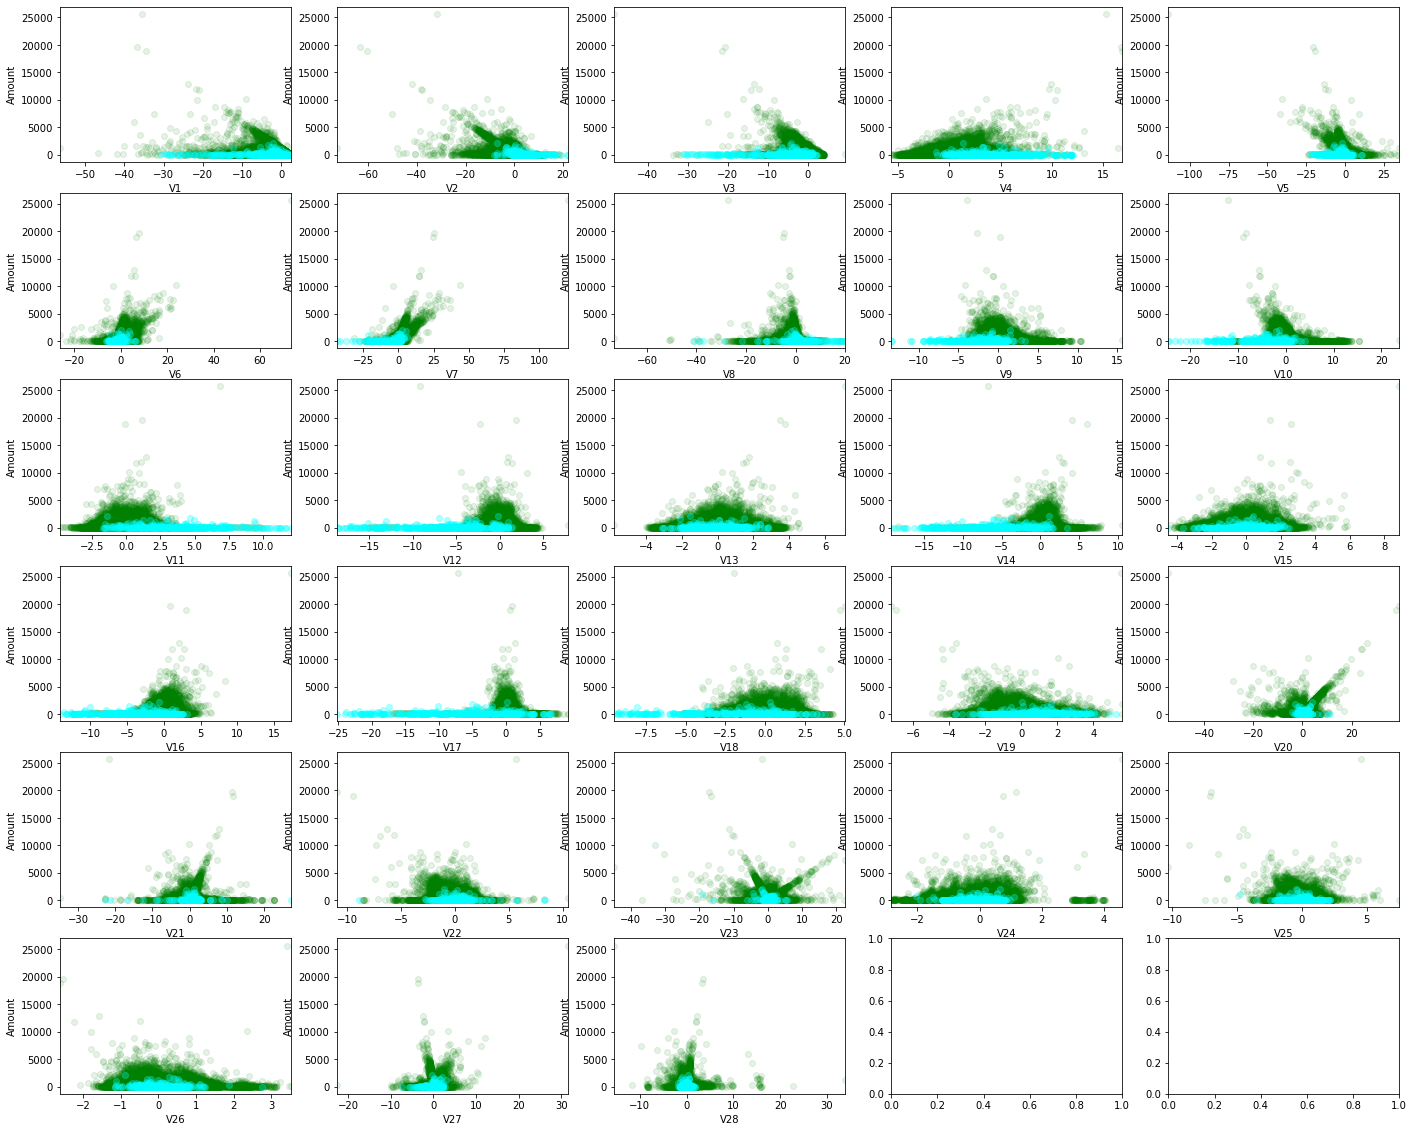

In [11]:
nrow = 6
ncol = 5 
fig, ax = plt.subplots(6, 5, figsize=(nrow*4, ncol*4))



row, col = 0, 0
for feat in [f for f in features if ((f!='Time') and (f!='Amount') ) ] :
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    ax[row, col].scatter(feat0, df_0['Amount'], color='g', alpha=0.1)
    ax[row, col].scatter(feat1, df_1['Amount'], color='cyan', alpha=0.3)
    
    ax[row, col].set_xlim(df_input[feat].min(), df_input[feat].max() )
    
    ax[row, col].set_ylabel('Amount')
    ax[row, col].set_xlabel(feat)
    
    #ax[row, col].legend(['No-fraud' 'Fraud'])
    
    if col == ncol-1:
        col = 0
        row = row+1
    else:
        col = col+1
        

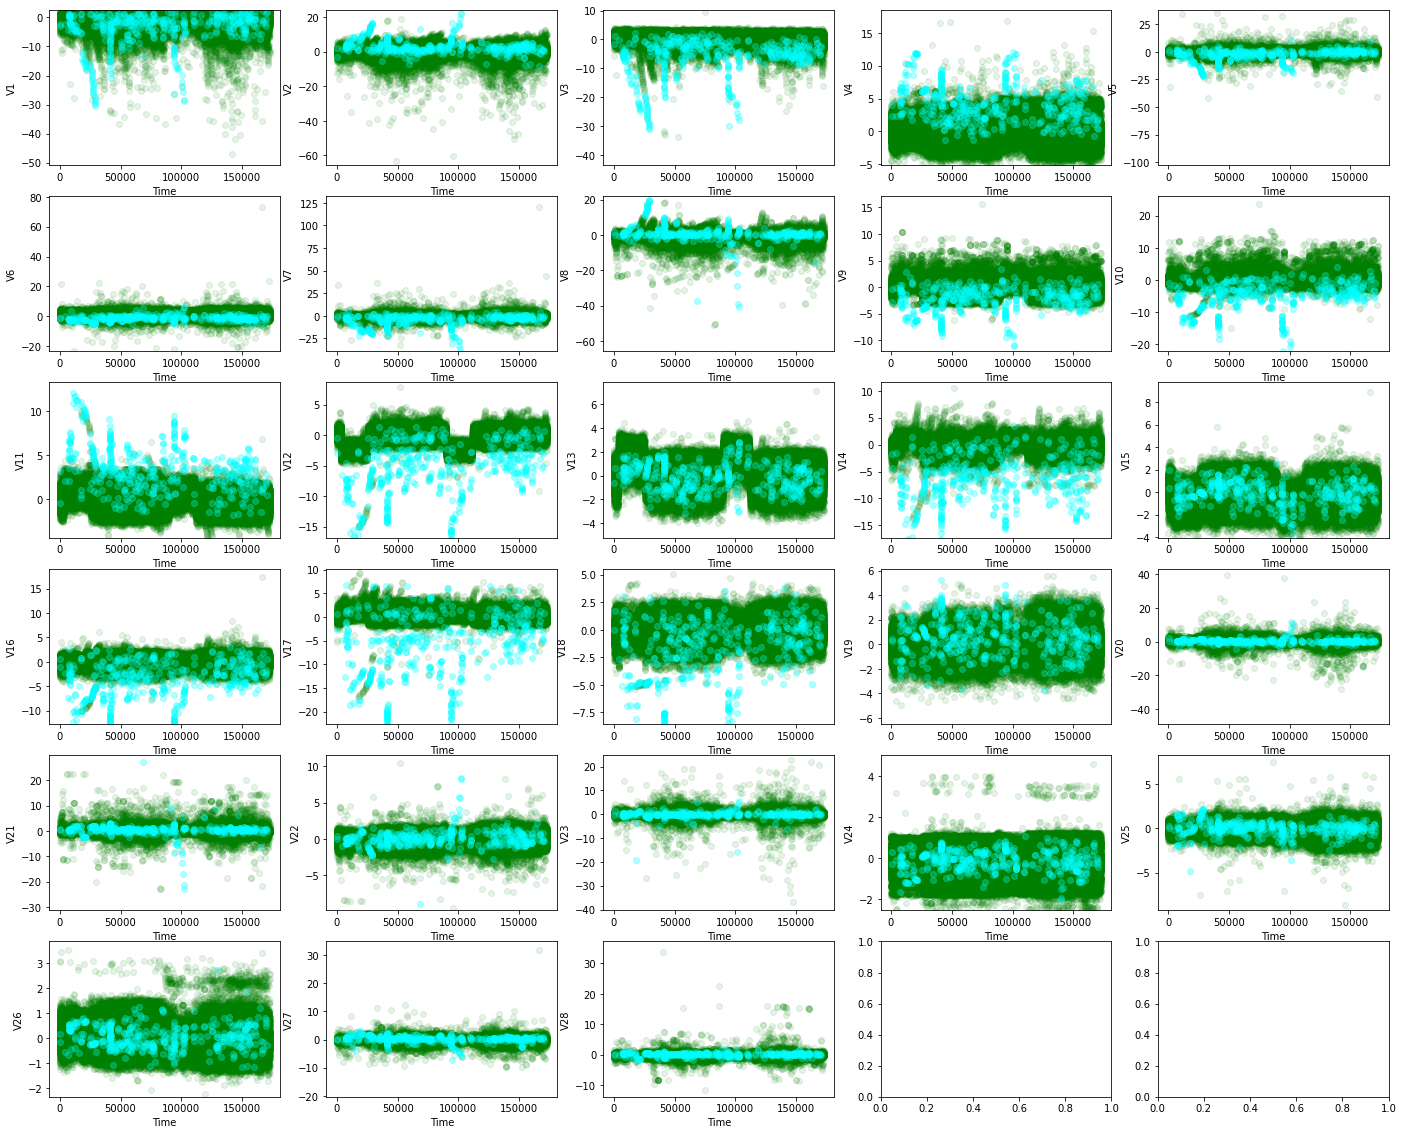

In [12]:
nrow = 6
ncol = 5 
fig, ax = plt.subplots(6, 5, figsize=(nrow*4, ncol*4))



row, col = 0, 0
for feat in [f for f in features if ((f!='Time') and (f!='Amount') ) ] :
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    ax[row, col].scatter(df_0['Time'], feat0, color='green', alpha=0.1)
    ax[row, col].scatter(df_1['Time'], feat1, color='cyan', alpha= 0.3 )
    

    ax[row, col].set_ylim(df_input[feat].min()*0.9, df_input[feat].max()*1.1 )
    
    ax[row, col].set_ylabel(feat)
    ax[row, col].set_xlabel('Time')
    
    #ax[row, col].legend(['No-fraud' 'Fraud'])
    
    if col == ncol-1:
        col = 0
        row = row+1
    else:
        col = col+1